In [ ]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris, make_classification

## 1 numerical attribute

In [ ]:
X = [[0], [1], [2], [3]]
y = [0, 0, 1, 1]

k = 3
knn = KNeighborsClassifier(n_neighbors=k).fit(X, y)

X_test = [[0.1]]
distances, neighbor_indexes = knn.kneighbors(X_test)

for i in range(k):
  neighbor = neighbor_indexes[0][i]
  distance = distances[0][i]
  print(f'{i+1}. instance: {X[neighbor][0]}, Distance: {distance}')

1. instance: 0, Distance: 0.1
2. instance: 1, Distance: 0.9
3. instance: 2, Distance: 1.9


In [ ]:
print(f'Predicted class: {knn.predict(X_test)[0]}')
print(f'Probabilities: {knn.predict_proba(X_test)[0]}')

Predicted class: 0
Probabilities: [0.66666667 0.33333333]


## 2 numerical attributes

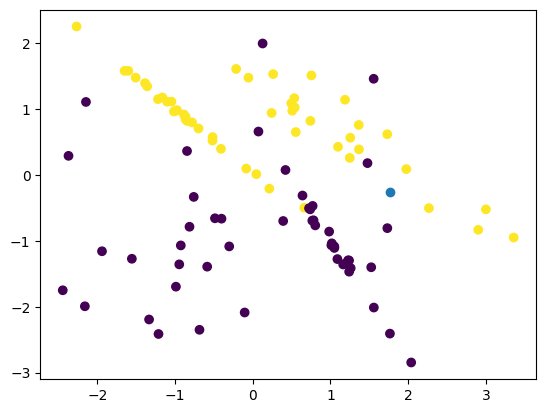

In [ ]:
X, Y = make_classification(n_features=2, n_redundant=0, random_state=12)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.01, shuffle=False)

plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train)
plt.scatter(X_test[:, 0], X_test[:, 1])

In [ ]:
k = 3
knn = KNeighborsClassifier(n_neighbors=k).fit(X_train, Y_train)

distances, neighbor_indexes = knn.kneighbors(X_test)

print(f'New instance: {X_test[0]}')
for i in range(k):
  neighbor = neighbor_indexes[0][i]
  distance = distances[0][i]
  print(f'{i+1}. instance: {X[neighbor][0]}, {X[neighbor][1]}, Distance: {distance}')


New instance: [ 1.77225379 -0.25245128]
1. instance: 1.9761198770184218, 0.0900739402552947, Distance: 0.398603697703455
2. instance: 1.4766510443155219, 0.18072214701388956, Distance: 0.5244236893375812
3. instance: 2.2672664275560086, -0.5020330792048915, Distance: 0.5543722396976416


In [ ]:
print(f'Predicted class: {knn.predict(X_test)}')
print(f'Probabilities: {knn.predict_proba(X_test)}')

Predicted class: [1]
Probabilities: [[0.33333333 0.66666667]]


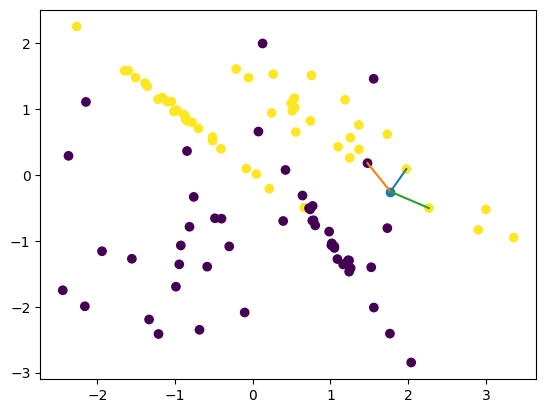

In [ ]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train)
plt.scatter(X_test[:, 0], X_test[:, 1])
for distance, neighbor in zip(distances[0], neighbor_indexes[0]):
  plt.plot([X_test[0][0], X_train[neighbor][0]], [X_test[0][1], X_train[neighbor][1]])

## Iris dataset

In [ ]:
iris_data = load_iris()
print(iris_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [ ]:
features, labels = load_iris(return_X_y=True, as_frame=True)

In [ ]:
features

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]

In [ ]:
set(labels)

{0, 1, 2}

In [ ]:
knn = KNeighborsClassifier().fit(features.values, labels)

In [ ]:
sample = np.array([5.8, 3.5, 1.9, 2.5]).reshape(1,-1)

print(f'predicted class: {knn.predict(sample)[0]}')
print(f'probabilities: {knn.predict_proba(sample)[0]}')

predicted class: 0
probabilities: [0.6 0.4 0. ]
